In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from germansentiment import SentimentModel

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df.pkl")

In [3]:
# This cell takes 72 minutes to run
# Use SentimentModel to predict sentiment for each text and add it to the dataframe in a new column
model = SentimentModel()

# Split dataframe into dataframes of 5000 rows each
dfs = np.array_split(df, len(df)/500)

# Iterate over dfs and predict sentiment for each text and add it to the dataframe in a new column
for i in range(len(dfs)):
    texts = dfs[i]["text"]
    sentiment = model.predict_sentiment(texts)
    dfs[i]["sentiment"] = sentiment

# Combine dataframes again
df = pd.concat(dfs)

In [4]:
df.to_pickle("../Data/df_sentiment.pkl")

In [5]:
df = pd.read_pickle("../Data/df_sentiment.pkl")
df

,nexis_id,title,publication_date,publication_year,publisher,text,sentiment
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,neutral
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,neutral
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,neutral
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,neutral
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",neutral
...,...,...,...,...,...,...,...
5420,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,neutral
5421,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",neutral
5422,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,neutral
5423,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,neutral


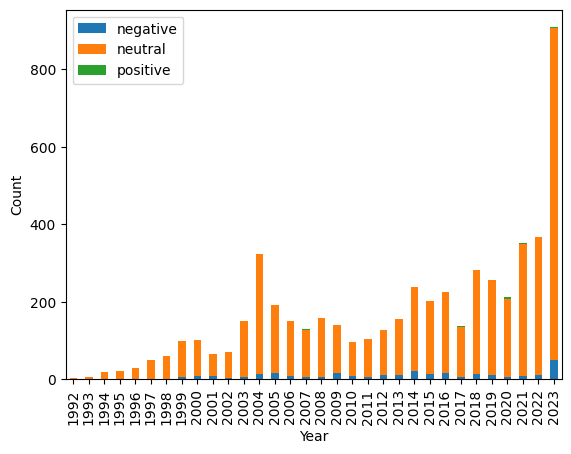

In [6]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/sentiment_stacked_barchart.png')

# Show the plot
plt.show()